In [1]:
import pandas as pd
data = pd.read_csv(open('data1.csv'))

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
%matplotlib inline

In [3]:
data1 = data.iloc[:, :28]
X_train = data1[:int(len(data1) * 0.7)]
X_test = data1[int(len(data1) * 0.7):-3]
x_train = X_train.values
x_test = X_test.values

In [4]:
print(x_train.shape)
print(x_test.shape)

(199367, 28)
(85440, 28)


In [5]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

encoding_dim = 2
input_img = Input(shape=(28,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(28, activation='sigmoid')(encoded)


Using TensorFlow backend.


In [6]:

autoencoder1 = Model(input_img, decoded)
encoder1 = Model(input_img, encoded)

In [7]:
encoded_input = Input(shape=(encoding_dim,))
decoder1_layer = autoencoder1.layers[-1]
decoder1 = Model(encoded_input, decoder1_layer(encoded_input))

In [8]:
autoencoder1.compile(optimizer='adadelta', loss='categorical_hinge')
autoencoder1.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 199367 samples, validate on 85440 samples
Epoch 1/10
199367/199367 [==============================] - 3s 14us/step - loss: 1.2962 - val_loss: 1.2454
Epoch 2/10
199367/199367 [==============================] - 2s 11us/step - loss: 0.5533 - val_loss: 0.9288
Epoch 3/10
199367/199367 [==============================] - 2s 12us/step - loss: 0.4372 - val_loss: 0.7932
Epoch 4/10
199367/199367 [==============================] - 2s 11us/step - loss: 0.3833 - val_loss: 0.7062
Epoch 5/10
199367/199367 [==============================] - 2s 11us/step - loss: 0.3423 - val_loss: 0.5780
Epoch 6/10
199367/199367 [==============================] - 2s 11us/step - loss: 0.2790 - val_loss: 0.4728
Epoch 7/10
199367/199367 [==============================] - 2s 10us/step - loss: 0.2465 - val_loss: 0.4484
Epoch 8/10
199367/199367 [==============================] - 2s 12us/step - loss: 0.2360 - val_loss: 0.4402
Epoch 9/10
199367/199367 [==============================] - 2s 11us/step - loss: 0.2309 - val

In [9]:
encoded_dt1 = encoder1.predict(x_test)
decoded_dt1 = decoder1.predict(encoded_dt1)

In [10]:
from keras import losses
import tensorflow as tf
import numpy as np

sess=tf.Session()
sess.run(tf.global_variables_initializer())

# in order to use binary_crossentropy in keras.losses array need convert to tensor
x_test = x_test.astype(np.float32)
original_data = tf.convert_to_tensor(x_test)
decoded_data = tf.convert_to_tensor(decoded_dt1)

loss_data = losses.categorical_hinge(original_data, decoded_data)
loss_data
val_loss = loss_data.eval(session=sess)

In [11]:
val_loss1 = val_loss.tolist()

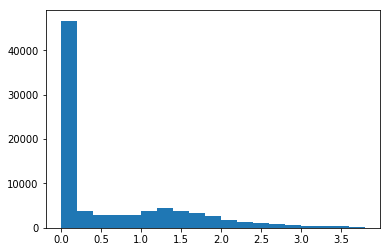

In [12]:
import matplotlib.pyplot as plt
group = np.arange(0, np.log(max(val_loss1)), 0.2)
plt.hist(val_loss1, group)
plt.show()

Deep Auto-Encoder

In [13]:
input_img = Input(shape=(28,))
encoded = Dense(18, activation='relu')(input_img)
encoded = Dense(6, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(18, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)

In [14]:
autoencoder2 = Model(input_img, decoded)

encoder2 = Model(input_img, encoded)
encoded_input = Input(shape=(2,))
decoder2_layer1 = autoencoder2.layers[-3]
decoder2_layer2 = autoencoder2.layers[-2]
decoder2_layer3 = autoencoder2.layers[-1]

In [15]:
decoder2 = Model(encoded_input,  ( (decoder2_layer3(decoder2_layer2(decoder2_layer1(encoded_input))) )) )

autoencoder2.compile(optimizer='adadelta', loss='categorical_hinge')

autoencoder2.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 199367 samples, validate on 85440 samples
Epoch 1/10
199367/199367 [==============================] - 4s 22us/step - loss: 0.5312 - val_loss: 0.2979
Epoch 2/10
199367/199367 [==============================] - 3s 16us/step - loss: 0.1520 - val_loss: 0.2253
Epoch 3/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.1167 - val_loss: 0.1995
Epoch 4/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.1026 - val_loss: 0.1739
Epoch 5/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.0943 - val_loss: 0.1709
Epoch 6/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.0890 - val_loss: 0.1592
Epoch 7/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.0847 - val_loss: 0.1501
Epoch 8/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.0817 - val_loss: 0.1475
Epoch 9/10
199367/199367 [==============================] - 3s 17us/step - loss: 0.0788 - val

In [16]:
encoded_dt2 = encoder2.predict(x_test)
decoded_dt2 = decoder2.predict(encoded_dt2)

In [17]:
from keras import losses
import tensorflow as tf
import numpy as np

sess=tf.Session()
sess.run(tf.global_variables_initializer())

# in order to use binary_crossentropy in keras.losses array need convert to tensor
x_test = x_test.astype(np.float32)
original_data = tf.convert_to_tensor(x_test)
decoded_data = tf.convert_to_tensor(decoded_dt2)

loss_data = losses.categorical_hinge(original_data, decoded_data)
loss_data
val_loss = loss_data.eval(session=sess)

In [18]:
val_loss2 = val_loss.tolist()
val_loss2.sort(reverse = True)

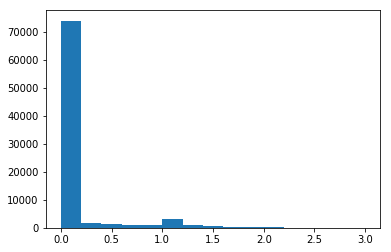

In [19]:
val_loss2 = val_loss.tolist()
import matplotlib.pyplot as plt
group = np.arange(0, np.log(max(val_loss2)), 0.2)
plt.hist(val_loss, group)
plt.show()

Scatter plot

In [20]:
x_whole = data.iloc[:, :28]

In [21]:
dt1 = encoder1.predict(x_whole).tolist()
dt2 = encoder2.predict(x_whole).tolist()

In [22]:
x1 = [i[0] for i in dt1]
y1 = [i[1] for i in dt1]
x2 = [i[0] for i in dt2]
y2 = [i[1] for i in dt2]

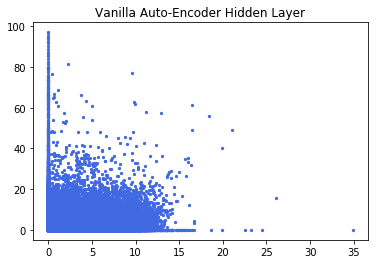

In [23]:
plt.title('Vanilla Auto-Encoder Hidden Layer')
plt.scatter(x1, y1, s=5, c='#4169E1', marker='o')

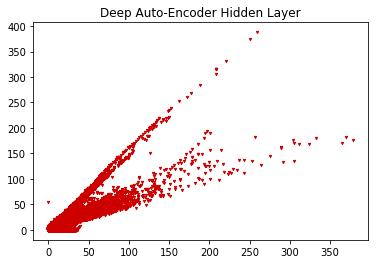

In [24]:
plt.title('Deep Auto-Encoder Hidden Layer')
plt.scatter(x2, y2, s=5, c='#CD0000', marker='v')

Classify

In [25]:
x3_0 = []
x3_1 = []
y3_0 = []
y3_1 = []
x4_0 = []
y4_0 = []
x4_1 = []
y4_1 = []
for i in range(len(data['Class'])):
    if data['Class'][i] == 1.0:
        x3_1.append(dt1[i][0])
        y3_1.append(dt1[i][1])
        x4_1.append(dt2[i][0])
        y4_1.append(dt2[i][1])
    else:
        x3_0.append(dt1[i][0])
        y3_0.append(dt1[i][1])
        x4_0.append(dt2[i][0])
        y4_0.append(dt2[i][1])

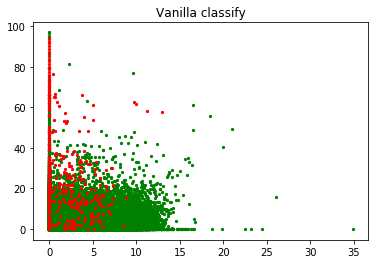

In [26]:
plt.title('Vanilla classify')
plt.scatter(x3_0, y3_0, s=5, c='green', marker='o')
plt.scatter(x3_1, y3_1, s=5, c='red', marker='o')
plt.show()

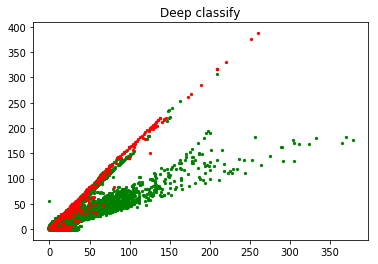

In [27]:
plt.title('Deep classify')
plt.scatter(x4_0, y4_0, s=5, c='green', marker='o')
plt.scatter(x4_1, y4_1, s=5, c='red', marker='o')
plt.show()